In [46]:
# Importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Inhabilitacion de advertencias
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
# Cargar datos
df = pd.read_csv("Mall_Customers.csv")
df.head()

# Mostrar datos resultantes del cargue de información
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Analisis exploratorio de datos (EDA)

# Se establece la tupla de numero de filas
df.shape

# Establece información de cantidad de filas, columnas e indices
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
# Calculo de estadisticas basicas de los datos
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_HC
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000,1.400000,1.590000
std,0.497633,13.969007,26.264721,25.823522,1.449311,1.212125
min,0.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,0.000000,1.000000
50%,1.000000,36.000000,61.500000,50.000000,1.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,3.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,4.000000,4.000000


In [11]:
# Se devuelven los valores nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# Se devuelven los valores duplicados
df.duplicated().sum()

0

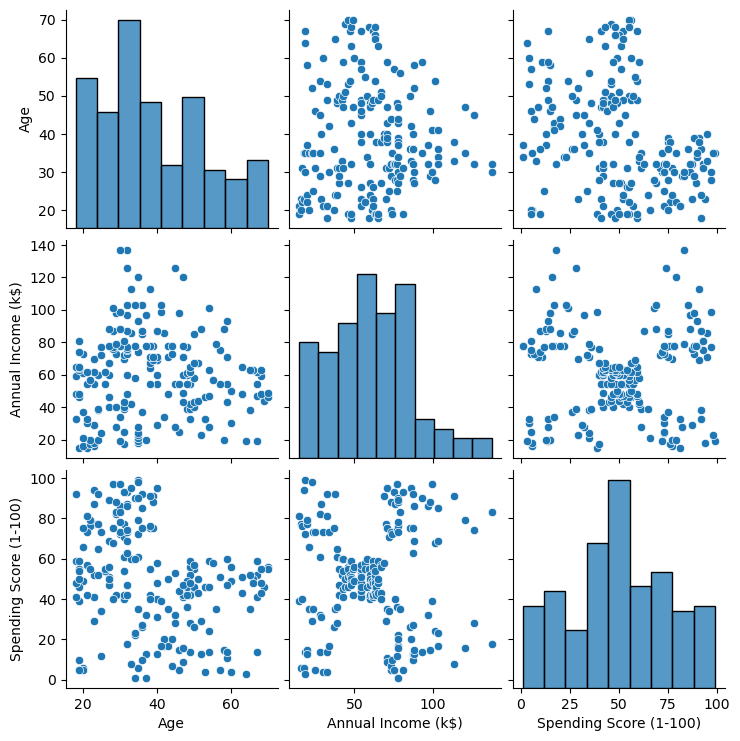

In [17]:
# Grafico de relacionamiento entre las columnas de edad, Renta anual, puntuacion de gastos
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

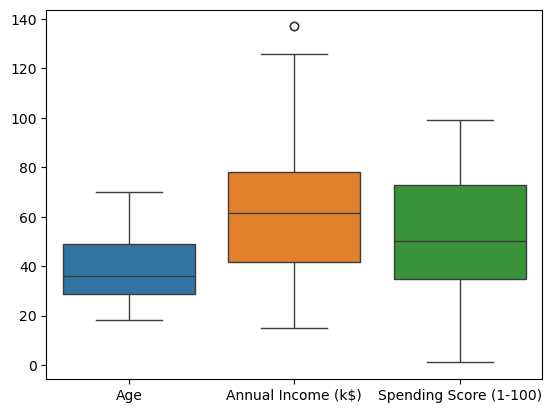

In [19]:
# Creacion de diagramas de caja.
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [21]:
# Preprosesamiento de datos

# Eliminación de columnas innecesarias
df = df.drop(['CustomerID'], axis=1)

In [22]:
# Conversion de variables categoricas a numericas de identificación
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [25]:
# Normalización de la tabla de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
# Seleccion de variables para el proceso de clusters

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Text(0, 0.5, 'Inercia')

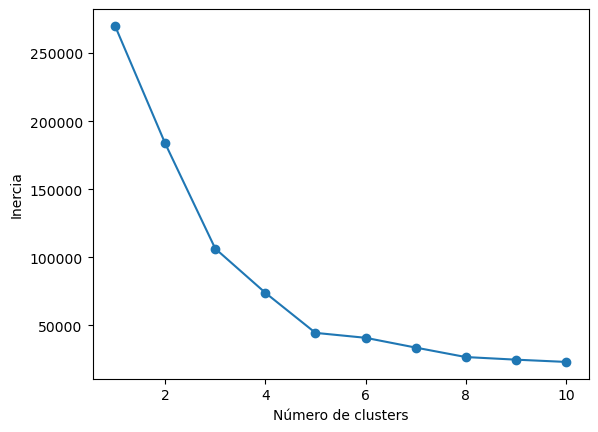

In [39]:
# Entrenamiento y modelo K-MEANS

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

In [40]:
# Entrenamiento de modelo K optimo
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster_KMeans'] = clusters

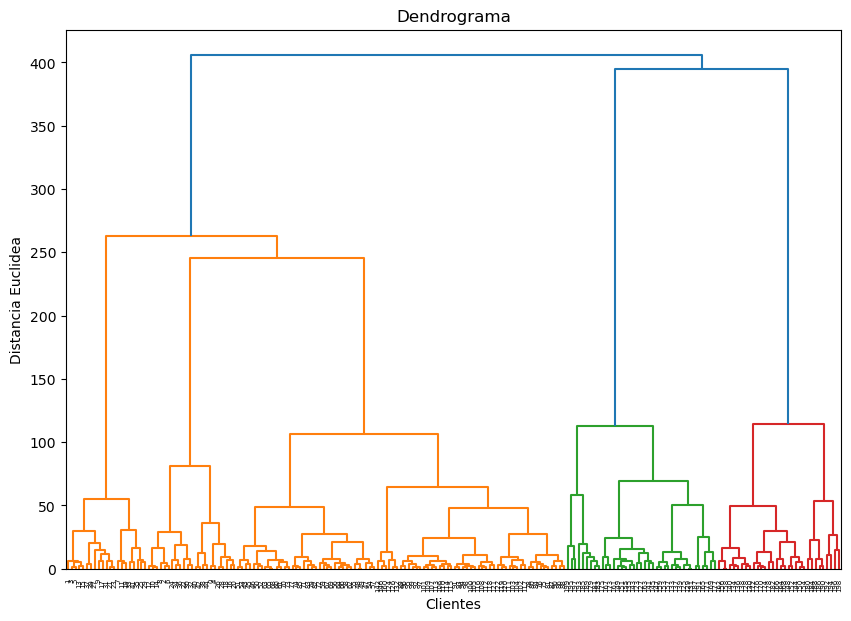

In [42]:
# Entrenamiento de Cluster Jerarquico

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidea')
plt.show()

In [45]:
hc = AgglomerativeClustering(n_clusters=5)
df['Cluster_HC'] = hc.fit_predict(X)

In [49]:
## EVALUACION DEL MODELO (POSTENTRENAMIENTO)

# Para K-Means
sil_kmeans = silhouette_score(X, df['Cluster_KMeans'])
cal_kmeans = calinski_harabasz_score(X, df['Cluster_KMeans'])

# Para Hierarchical
sil_hc = silhouette_score(X, df['Cluster_HC'])
cal_hc = calinski_harabasz_score(X, df['Cluster_HC'])

print(f"K-Means - Silhouette: {sil_kmeans}, Calinski-Harabasz: {cal_kmeans}")
print(f"Hierarchical - Silhouette: {sil_hc}, Calinski-Harabasz: {cal_hc}")

K-Means - Silhouette: 0.553931997444648, Calinski-Harabasz: 247.35899338037288
Hierarchical - Silhouette: 0.5529945955148897, Calinski-Harabasz: 243.07142892964563


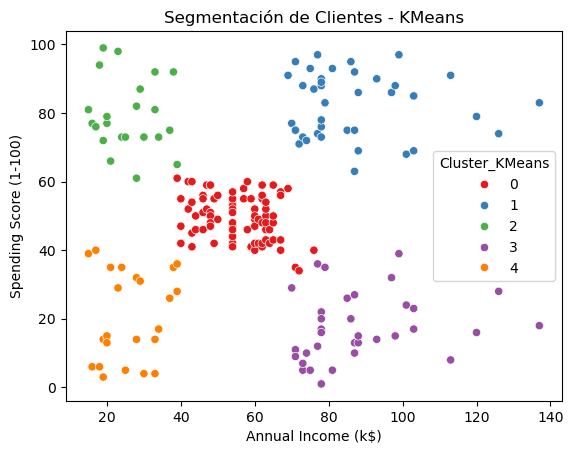

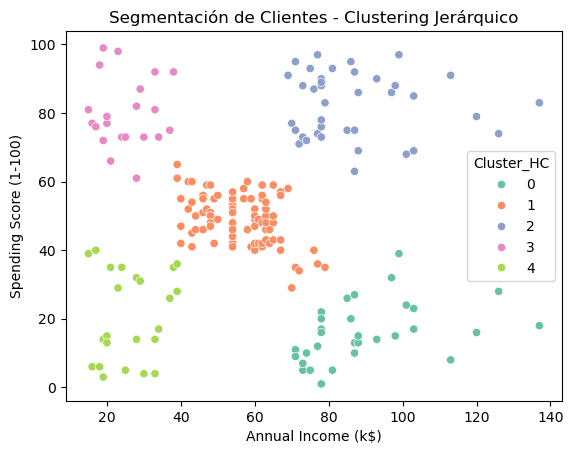

In [52]:
# Visualización de cluster KMeans
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', palette='Set1')
plt.title('Segmentación de Clientes - KMeans')
plt.show()

# Visualizacion de cluster Clustering Jerarquico
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_HC', palette='Set2')
plt.title('Segmentación de Clientes - Clustering Jerárquico')
plt.show()
